In [74]:
import signac
import matplotlib.pyplot as plt
from cmeutils.sampling import is_equilibrated
import numpy as np
from cmeutils.structure import gsd_rdf
import gsd.hoomd

In [75]:
def ellipsoid_trajectory(new_gsd, old_gsd):
    with gsd.hoomd.open(new_gsd, "w") as new_t:
        with gsd.hoomd.open(old_gsd, "r") as old_t:
            for snap in old_t:
                snap.particles.type_shapes = [
                    {"type": "Ellipsoid",
                        "a": 0.05,
                        "b": 0.39,
                        "c":0.635}
                ]
                snap.validate()
                new_t.append(snap)

In [7]:
project = signac.get_project()
jobs = list(project.find_jobs({"doc.done":True}))

In [ ]:
for job in jobs:
    ml_gsd = job.fn("ML_trajectory.gsd")
    rigid_gsd = job.fn("rigid_trajectory.gsd")
    # create ellipsoide trajectory
    ellipsoid_trajectory(job.fn("E_ML_trajectory.gsd"), ml_gsd)
    ellipsoid_trajectory(job.fn("E_rigid_trajectory.gsd"), rigid_gsd)

In [51]:
train_kT= [4.0, 7.0]


******************
kT:  4.0
rigid equilibrated:  True
UA equilibrated:  True
******************
kT:  7.0
rigid equilibrated:  True
UA equilibrated:  True


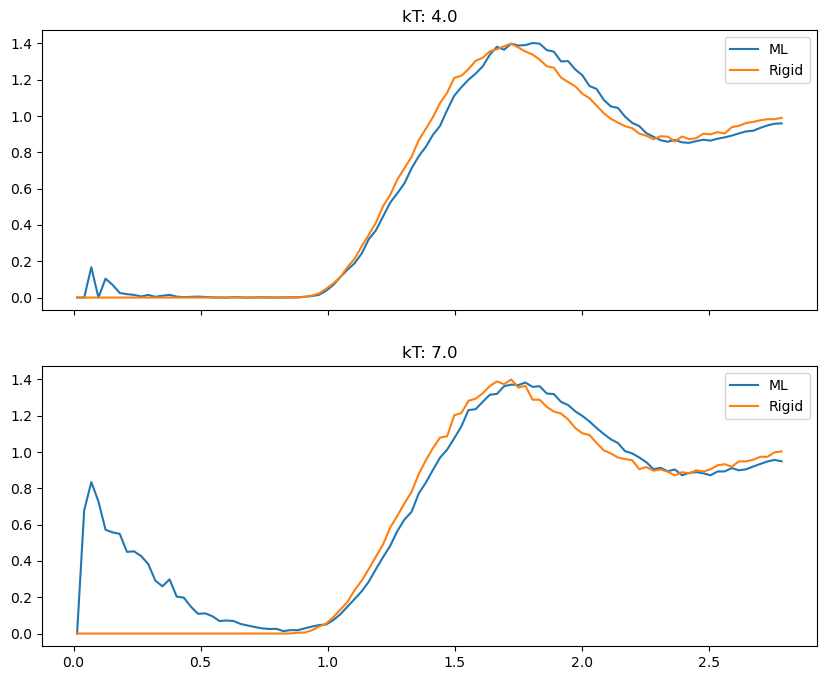

In [77]:
fig, (ax1, ax2) = plt.subplots(2, sharey=True, sharex=True, figsize=(10, 8))
subplots = [ax1, ax2]
i=0
for kT in train_kT:
    job = list(project.find_jobs({"doc.done":True, 'kT': kT}))[0]
    ml_gsd = job.fn("ML_trajectory.gsd")
    rigid_gsd = job.fn("rigid_trajectory.gsd")
    rigid_log = job.fn("rigid_log.txt")
    ua_gsd = job.fn("UA_trajectory.gsd")
    ua_log = job.fn("UA_log.txt")

    sample_idx = -300
    rigid_pe = np.genfromtxt(rigid_log, names=True)["mdcomputeThermodynamicQuantitiespotential_energy"]
    ua_pe = np.genfromtxt(ua_log, names=True)["mdcomputeThermodynamicQuantitiespotential_energy"]

    rigid_eq = is_equilibrated(rigid_pe[sample_idx:],  threshold_fraction=0.20, threshold_neff=200)[0]
    ua_eq = is_equilibrated(ua_pe[sample_idx:],  threshold_fraction=0.20, threshold_neff=200)[0]
    print('******************')
    print('kT: ', job.sp.kT)
    print('rigid equilibrated: ', rigid_eq)
    print('UA equilibrated: ', ua_eq)

    ML_rdf, ML_rdf_norm = gsd_rdf(gsdfile=ml_gsd, A_name="A", B_name="A",r_max=2.8, start=sample_idx, stop=-1)
    rigid_rdf, rigid_rdf_norm = gsd_rdf(gsdfile=rigid_gsd, A_name="rigid", B_name="rigid",r_max=2.8, start=sample_idx, stop=-1)

    
    subplots[i].plot(ML_rdf.bin_centers, ML_rdf.rdf * ML_rdf_norm, label="ML")
    subplots[i].plot(rigid_rdf.bin_centers, rigid_rdf.rdf * rigid_rdf_norm, label="Rigid")
    subplots[i].set_title(f'kT: {job.sp.kT}')
    subplots[i].legend()


                    
    i+= 1


******************
kT:  1.0
rigid equilibrated:  False
UA equilibrated:  False
******************
kT:  3.0
rigid equilibrated:  True
UA equilibrated:  True
******************
kT:  5.0
rigid equilibrated:  True
UA equilibrated:  True
******************
kT:  6.0
rigid equilibrated:  True
UA equilibrated:  True
******************
kT:  9.0
rigid equilibrated:  True
UA equilibrated:  True


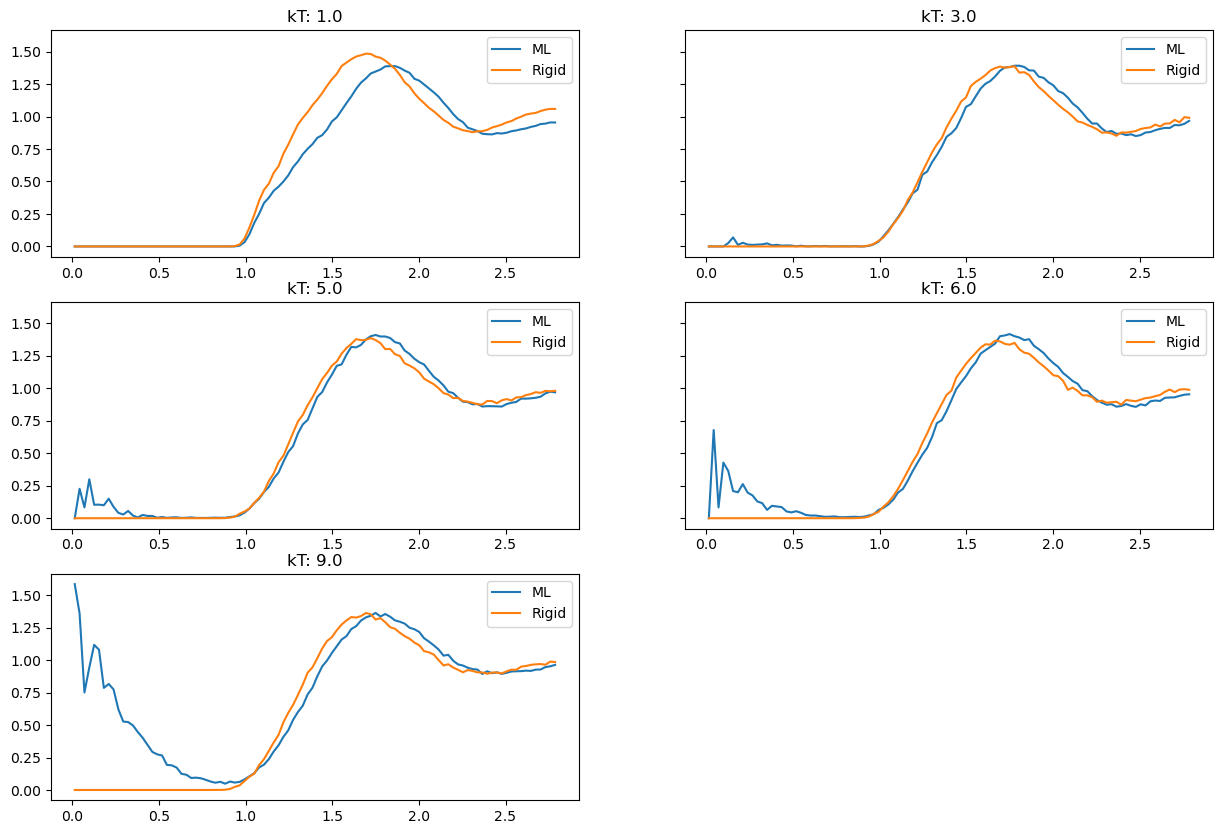

In [78]:
fig, ax = plt.subplots(3, 2, sharey=True, figsize=(15, 10))
ax = np.asarray(ax).reshape(6)
fig.delaxes(ax[-1])
test_kT = [1.0, 3.0, 5.0, 6.0, 9.0]
sample_idx = [-1500, -300, -300, -300, -300] 
for i, kT in enumerate(test_kT):     
        job = list(project.find_jobs({"doc.done":True, 'kT': kT}))[0]
        ml_gsd = job.fn("ML_trajectory.gsd")
        rigid_gsd = job.fn("rigid_trajectory.gsd")
        rigid_log = job.fn("rigid_log.txt")
        ua_gsd = job.fn("UA_trajectory.gsd")
        ua_log = job.fn("UA_log.txt")

    
        rigid_pe = np.genfromtxt(rigid_log, names=True)["mdcomputeThermodynamicQuantitiespotential_energy"]
        ua_pe = np.genfromtxt(ua_log, names=True)["mdcomputeThermodynamicQuantitiespotential_energy"]
        idx = sample_idx[i]
        rigid_eq = is_equilibrated(rigid_pe[idx:],  threshold_fraction=0.20, threshold_neff=200)[0]
        ua_eq = is_equilibrated(ua_pe[idx:],  threshold_fraction=0.20, threshold_neff=200)[0]
        print('******************')
        print('kT: ', job.sp.kT)
        print('rigid equilibrated: ', rigid_eq)
        print('UA equilibrated: ', ua_eq)

        ML_rdf, ML_rdf_norm = gsd_rdf(gsdfile=ml_gsd, A_name="A", B_name="A",r_max=2.8, start=idx, stop=-1)
        rigid_rdf, rigid_rdf_norm = gsd_rdf(gsdfile=rigid_gsd, A_name="rigid", B_name="rigid",r_max=2.8, start=idx, stop=-1)

        ax[i].plot(ML_rdf.bin_centers, ML_rdf.rdf * ML_rdf_norm, label="ML")
        ax[i].plot(rigid_rdf.bin_centers, rigid_rdf.rdf * rigid_rdf_norm, label="Rigid")
        ax[i].set_title(f'kT: {job.sp.kT}')
        ax[i].legend()



In [69]:
list(project.find_jobs({"doc.done":True, 'kT': 9.0}))[0].id

'3fa9ef8245de0dd40b08dba5596a00bc'